In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dax = pd.read_excel('daxformm.xlsx')
dax.head(10)

,Date,Close,High,Low,Open,Volume,returns,pct_returns
0,1987-12-30,1005.190002,1005.190002,1005.190002,1005.190002,0,NaN,0.000000
1,1988-01-04,956.489990,956.489990,956.489990,956.489990,0,-0.048449,-4.844856
2,1988-01-05,996.099976,996.099976,996.099976,996.099976,0,0.041412,4.141181
3,1988-01-06,1006.010010,1006.010010,1006.010010,1006.010010,0,0.009949,0.994883
4,1988-01-07,1014.469971,1014.469971,1014.469971,1014.469971,0,0.008409,0.840942
5,1988-01-08,1026.689941,1026.689941,1026.689941,1026.689941,0,0.012046,1.204567
6,1988-01-11,987.520020,987.520020,987.520020,987.520020,0,-0.038152,-3.815166
7,1988-01-12,986.890015,986.890015,986.890015,986.890015,0,-0.000638,-0.063797
8,1988-01-13,965.770020,965.770020,965.770020,965.770020,0,-0.021401,-2.140056
9,1988-01-14,974.460022,974.460022,974.460022,974.460022,0,0.008998,0.899800


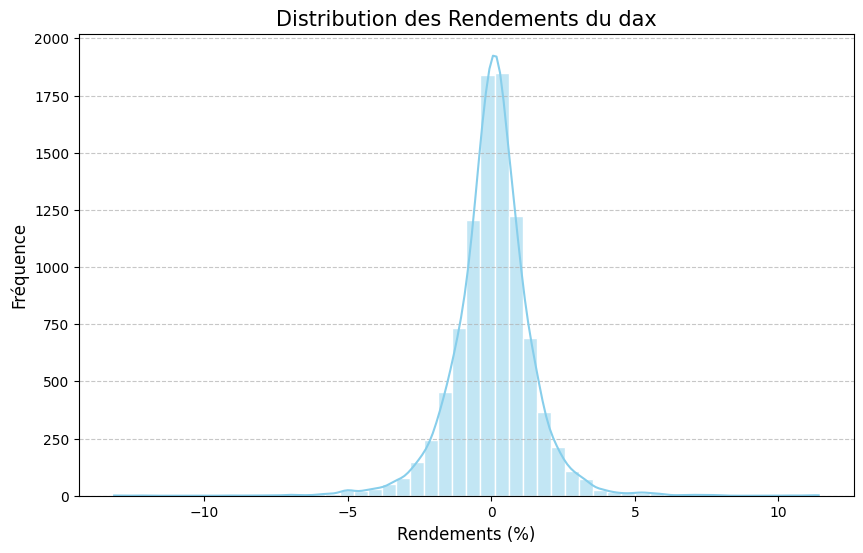

In [6]:
# Création de l'histogramme avec Seaborn
plt.figure(figsize=(10, 6))  # Taille du graphique
sns.histplot(
    data=dax,
    x='pct_returns',
    bins=50,  # Nombre de barres (ajustable)
    kde=True,  # Courbe de densité
    color='skyblue',
    edgecolor='white'  # Bordure des barres
)

# Personnalisation
plt.title('Distribution des Rendements du dax', fontsize=15)
plt.xlabel('Rendements (%)', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grille horizontale

# Affichage
plt.show()


In [9]:
from scipy.stats import jarque_bera

# Calcul du test Jarque-Bera (retourne seulement stat et p-value)
stat, p_value = jarque_bera(dax['pct_returns'].dropna())

# Calcul séparé de la skewness et kurtosis
skewness = dax['returns'].skew()
kurtosis = dax['returns'].kurtosis()  # Kurtosis excès (0 pour une normale)

print(f"Jarque-Bera Test: Stat={stat:.4f}, p-value={p_value:.4f}")
print(f"Skewness: {skewness:.4f}, Kurtosis: {kurtosis:.4f}")

Jarque-Bera Test: Stat=17117.6752, p-value=0.0000
Skewness: -0.1264, Kurtosis: 6.5872


In [10]:
from scipy.stats import shapiro

# Supposons que 'returns' est une série pandas des rendements
stat, p_value = shapiro(dax['returns'].dropna())
print(f"Shapiro-Wilk Test: Stat={stat:.4f}, p-value={p_value:.4f}")

if p_value > 0.05:
    print("Les données suivent une loi normale (ne rejette pas H0)")
else:
    print("Les données ne suivent pas une loi normale (rejette H0)")

Shapiro-Wilk Test: Stat=0.9376, p-value=0.0000
Les données ne suivent pas une loi normale (rejette H0)


c:\users\hp\documents\trading research\env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9462.
  res = hypotest_fun_out(*samples, **kwds)
